# Some key concepts about algorithms (in general) <a class="tocSkip">
<br><br><br>

<div style="text-align: right"> <em>Alexey Bochkarev, 2020, a [at] bochkarev (dot) io </em></div>

# An outline <a class="tocSkip">
- An algorithm = a recipe
- several **parameters** to keep an eye on:
    + runtime:
        - example: sorting. Bubble sort vs. merge-sort (runtimes graph)
        - concepts: worst-case complexity, $O(\cdot)$, $\Omega(\cdot)$, $\Theta(\cdot)$ notations.
        - NP-complete problems, exact algos and heuristics
    + correctness. Approxmate algos.
    + space (memory) requirements -- also an important parameter. "In place" algorithms
    + a note on parallel execution
    + randomized algorithms (sometimes cool)
- a note on **data structures**
    + **the concept:** describing an interface and space/time properties
    + some examples: array, heap/tree, hash table (dictionary), union-find maybe(?)
- maybe some biological note?
- **the main part of the session:** conclusions + further reading/learning

# The main goal <a class="tocSkip">
    
- To *mention* some key definitions and "buzzwords", 
- To provide a first glimpse on the structure of the material out there. **(not a substitute to a proper CS course)**
- So you could learn more if needed, and know what to google.
    
**Why bother?**
- to create / implement algorithms
- to understand what is going on in a paper
- to understand what is possible (or not), and what to use for your problem at hand
    
**Prereqs:** ability to read (pseudo-)code -- we will use Python 3 now.

# Algorithms

## What is an algorithm?
Well, a recipe. Not good as a strict definition, but as put by [The Economist](https://www.economist.com/the-economist-explains/2017/08/29/what-are-algorithms),

*An algorithm is, essentially, a brainless way of doing clever things.*

A clear, step-by-step instructions manual, how to acheive something specific. Like, 
- get to the bus stop from some specific point, 
- sort an array of $N$ numbers, or
- assemble the original genome sequence from a smaller, potentially overlapping pieces. 
- ...and so on.

(Without too vague instructions.)

Not a big deal, so far...

### Let's use sorting <a class="tocSkip">
**INPUT:**   an array of some fixed length, $N$. Say, integer numbers<br>
**OUTPUT:**  a sorted version of the same array (each next number is larger than the previous one).
    
For example, [4,6,1,3,2,5,7] $\rightarrow$ [1,2,3,4,5,6,7]. Obviously, there are many ways to approach the problem.

In [9]:
def bubble_sort(input_array):
    done = False
    N = len(input_array)
    out_array = input_array
    while not done:
        done = True
        for i in range(N-1):
            if out_array[i] > out_array[i+1]:
                n_i = out_array[i]
                n_i_plus_1 = out_array[i+1]
                out_array[i] = n_i_plus_1
                out_array[i+1] = n_i
                done = False
                
    return out_array

In [10]:
bubble_sort([4,6,1,3,2,5,7])

[1, 2, 3, 4, 5, 6, 7]

In [11]:
bubble_sort([6,4,7,1,2])

[1, 2, 4, 6, 7]

### Is it the only option, though? <a class="tocSkip">

In [12]:
def true_sort(input_array):
    return("Every array is sorted, if you look with the right mindset...")

In [13]:
true_sort([1,5,4,2,3])

'Every array is sorted, if you look with the right mindset...'

### or (this one is tricky): <a class="tocSkip">

In [14]:
def real_quick_sort(input_array):
    N = len(input_array)
    
    return(
        [i+1 for i in range(N)]
    )

In [15]:
real_quick_sort([1,5,4,2,3])

[1, 2, 3, 4, 5]

In [16]:
real_quick_sort([4,6,1,3,2,5,7])

[1, 2, 3, 4, 5, 6, 7]

### Another approach: merge sort <a class="tocSkip">

Imagine an array, split it into two halves.What would happen if we had some magic function that would sort each half? We would have ended up with this:

![halfsorted](img/merge_sort.png)

Now, we could easily merge these two into a sorted array: just use two pointers `i left` and `i right`. Scan left to right, picking the smallest one and increasing pointers as necessary.

Let us just fix this in the code, while we are at it:

In [17]:
# the only slightly tricky part here is
# handling edge cases

def merge(left, right):
    result = []
    i_left = 0; i_right = 0
    while len(left) + len(right) > len(result):
        if i_left == len(left):
            if i_right < len(right):                
                result.append(right[i_right])
                i_right += 1
        else:
            if i_right == len(right):
                result.append(left[i_left])
                i_left += 1
            else:
                result.append(min(right[i_right], left[i_left]))
                if right[i_right] < left[i_left]:
                    i_right += 1
                else:
                    i_left += 1
    return result

In [18]:
merge([1,3,5,7],[2,4,6])

[1, 2, 3, 4, 5, 6, 7]

OK, you might say, but we don't have any "magic function", do we?

Let's just cheat now, and pretend we do. This is best explained by code right away, perhaps:

In [19]:
def merge_sort(input_array):
    result = []

    N = len(input_array)
    if N == 1:
        return input_array # nothing to sort
    
    m = N // 2 # find the middle
    left = input_array[:m]
    right = input_array[m:]
    
    # here is the magic
    left = merge_sort(left)
    right = merge_sort(right)
    
    return merge(left, right)

In [20]:
# In case you were hesitating:
merge_sort([4,6,1,3,2,5,7])

[1, 2, 3, 4, 5, 6, 7]

## Typical characteristics
- does it result in a desirable outcome? **(correctness)**
- how fast is it? **(runtime)**
- how much memory does it take? **(space/memory requirement)**

### Ok, let's start with correctness
Let's prepare a tiny testing unit to check if our algorithms work. It won't guarantee anything, but would *suggest* that we haven't screwed up anywhere.

In [21]:
import numpy as np

def get_consec_instance(N):
    input_sorted = [i+1 for i in range(N)] # generate a sequence of numbers
    input_unsorted = np.random.permutation(input_sorted)
    return input_sorted, input_unsorted

def get_rnd_instance(N):
    input_sorted = [0 for i in range(N)]
    input_sorted[0] = np.random.randint(N)
    for i in range(1,N):
        input_sorted[i] = input_sorted[i-1] + np.random.randint(N)
        
    input_unsorted = np.random.permutation(input_sorted)

    return input_sorted, input_unsorted

In [31]:
def test_algo(label, sort_function, inst_generators, no_instances=50, N = 7):
    
    print("Testing algo: `{}`".format(label))

    for gen_function, label in inst_generators:
        print(f"{label}")
        n_failed = 0
        for _ in range(no_instances):
            arr_sorted, arr_unsorted = gen_function(N)
            out = sort_function(arr_unsorted)
            if np.all(out == arr_sorted):
                print(".", end="")
            else:
                print(f"\nFAIL: expected {arr_sorted}, returned {out}", end="")
                n_failed += 1
        print(f"\ndone. FAILS: {n_failed} out of {no_instances}")

In [32]:
for sorting_func, label in [
    (bubble_sort, "Bubble sort"), 
    (merge_sort, "Merge sort"), 
    (true_sort, "True mega sort"), 
    (real_quick_sort, "Real quick sort")]:
    
    print("==================================================")
    test_algo(label, sorting_func, 
              [(get_consec_instance, "Consecutive numbers"), 
               (get_rnd_instance, "Random numbers")])

Testing algo: `Bubble sort`
Consecutive numbers
..................................................
done. FAILS: 0 out of 50
Random numbers
..................................................
done. FAILS: 0 out of 50
Testing algo: `Merge sort`
Consecutive numbers
..................................................
done. FAILS: 0 out of 50
Random numbers
..................................................
done. FAILS: 0 out of 50
Testing algo: `True mega sort`
Consecutive numbers

FAIL: expected [1, 2, 3, 4, 5, 6, 7], returned Every array is sorted, if you look with the right mindset...
FAIL: expected [1, 2, 3, 4, 5, 6, 7], returned Every array is sorted, if you look with the right mindset...
FAIL: expected [1, 2, 3, 4, 5, 6, 7], returned Every array is sorted, if you look with the right mindset...
FAIL: expected [1, 2, 3, 4, 5, 6, 7], returned Every array is sorted, if you look with the right mindset...
FAIL: expected [1, 2, 3, 4, 5, 6, 7], returned Every array is sorted, if you look with 

(This "real quick sort" is not completely "fake", though. It is okay assuming you know something about your `input_array`. If interested, see [Bucket sort](https://en.wikipedia.org/wiki/Bucket_sort), [Radix sort](https://en.wikipedia.org/wiki/Radix_sort) and such)

### Runtime

Everyone is data-driven now, right? -- so let's just make some data (again) and see how these different approaches perform.

In [17]:
from time import time

def get_runtimes(sort_function, gen_function=get_rnd_instance, N=100, no_inst = 100):
    runtimes = []
    for i in range(no_inst):
        _, arr_input = gen_function(N)
        t0 = time()
        out = sort_function(arr_input)
        t1 = time()
        runtimes.append(t1-t0) # runtime in seconds
    return runtimes

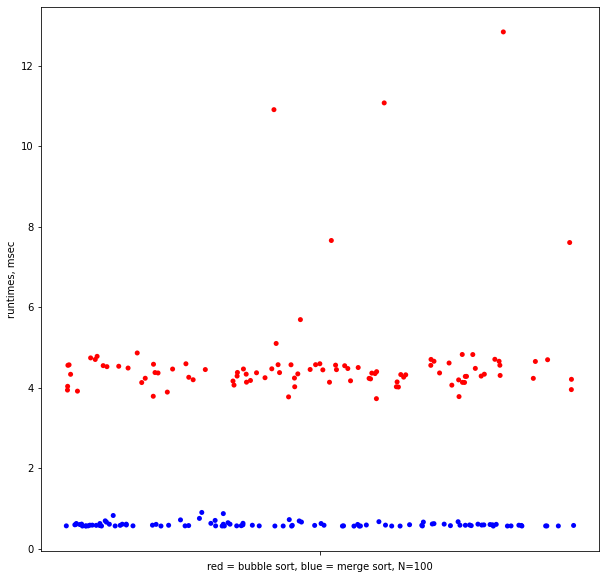

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

def make_runtimes_plot(gen_function = get_rnd_instance, N = 10, no_inst=100):
    runtimes = pd.DataFrame(data = {
        'Bubble_sort' : get_runtimes(bubble_sort, gen_function, N, no_inst),
        'Merge_sort' : get_runtimes(merge_sort, gen_function)
    }, columns = ['Bubble_sort', 'Merge_sort'])

    ax = sns.stripplot(y = runtimes["Bubble_sort"]*1000., color='red', jitter=True)
    ax = sns.stripplot(y = runtimes['Merge_sort']*1000., color='blue', ax = ax, jitter = True)
    ax.set(xlabel='red = bubble sort, blue = merge sort, N={}'.format(N), ylabel='runtimes, msec')
    return ax

plt.figure(figsize = (10,10))
make_runtimes_plot(N=100)

### However, there are some problems with this approach.

### Problem 1: scaling
First, let us consider what happens as we change the length of the input. It is what usually matters -- how does our algorithm *scale* (no one is really interested in sorting arrays with `N=5`...)

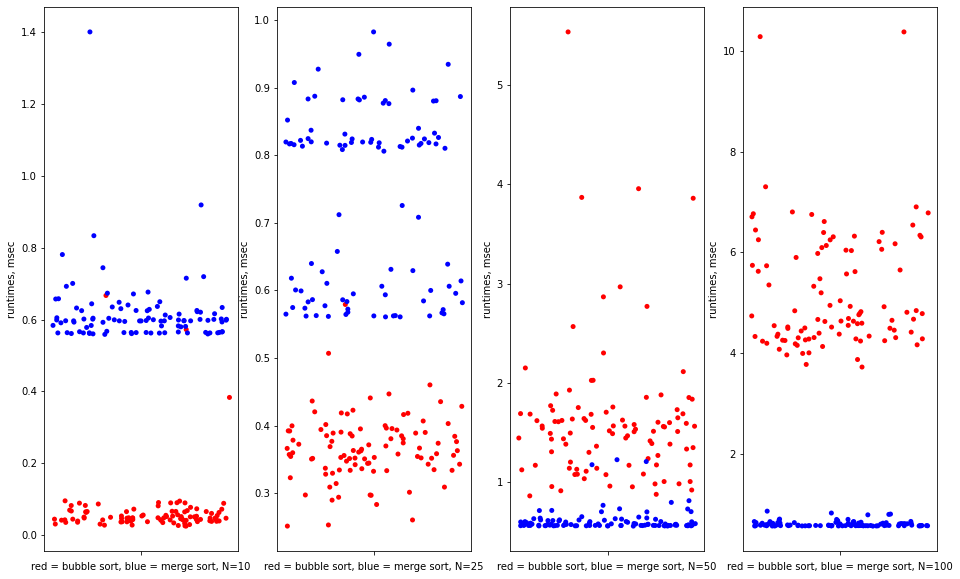

In [31]:
plt.figure(figsize = (16,10))
plt.subplot(1,4,1)
make_runtimes_plot(N=10)

plt.subplot(1,4,2)
make_runtimes_plot(N=25)

plt.subplot(1,4,3)
make_runtimes_plot(N=50)

plt.subplot(1,4,4)
make_runtimes_plot(N=100)

So okay, to understand what's going on here, we'd need to run the experiment for several different `N`-s. Say, let us plot mean runtimes instead...

In [20]:
def make_mean_runtimes(sort_function, gen_function = get_rnd_instance, N1 = 10, N2 = 100, no_inst=50):
    runtimes = []
    for i in range(N2-N1):
        runtimes.append(np.mean(get_runtimes(sort_function, gen_function, N = N1 + i, no_inst = no_inst))*1000)
    
    return runtimes

N1 = 5; N2 = 100

rt_bsort = make_mean_runtimes(bubble_sort, N1=N1, N2 = N2)
rt_msort = make_mean_runtimes(merge_sort, N1=N1, N2 = N2)

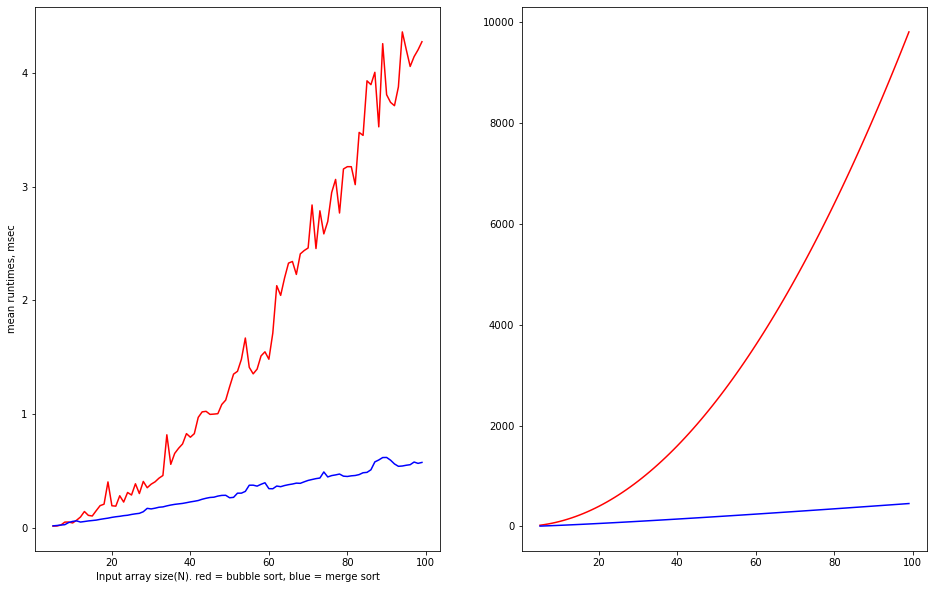

In [21]:
from math import log

plt.figure(figsize = (16,10))
plt.subplot(1,2,1)
plt.plot([N1 + i for i in range(N2-N1)], rt_bsort, 'r-')
plt.plot([N1 + i for i in range(N2-N1)], rt_msort, 'b-')
plt.gca().set(xlabel='Input array size(N). red = bubble sort, blue = merge sort', ylabel='mean runtimes, msec')
plt.subplot(1,2,2)
plt.plot([N1 + i for i in range(N2-N1)], [x*x for x in range(N1, N2)], 'r-')
plt.plot([N1 + i for i in range(N2-N1)], [x*log(x) for x in range(N1,N2)], 'b-')

### Problem 2: special inputs
Then, let us feed in some pretty special inputs:

In [22]:
def gen_magic_sequence(N):
    input_sorted = [i+1 for i in range(N)] # generate a sequence of numbers
    input_unsorted = [i+1 for i in range(N)]
    a = input_unsorted[N // 2]
    b = input_unsorted[N // 2 + 1]
    input_unsorted[N // 2] = b; input_unsorted[N // 2 + 1] = a # how 'bout this?!
    
    return input_sorted, input_unsorted

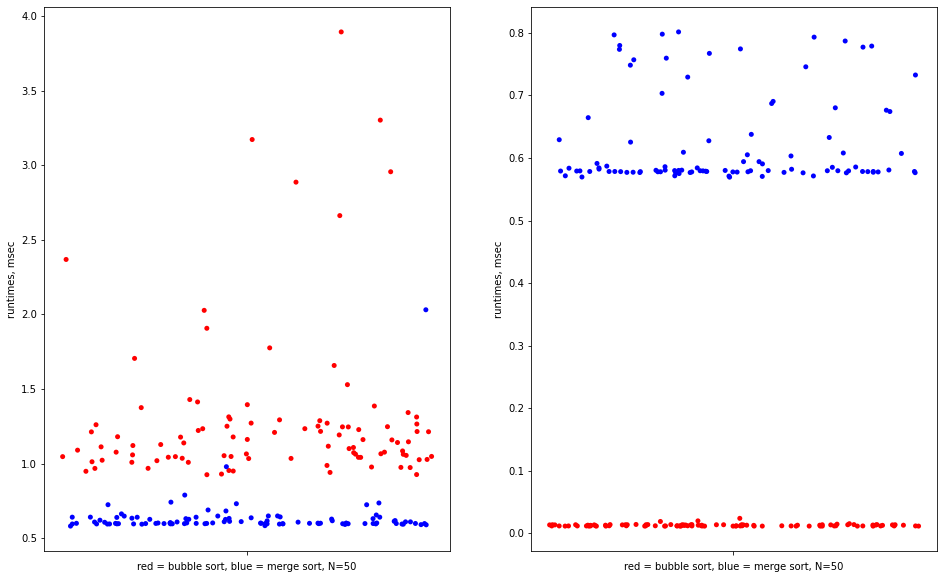

In [33]:
plt.figure(figsize = (16,10))
plt.subplot(1,2,1)
make_runtimes_plot(N=50)

plt.subplot(1,2,2)
make_runtimes_plot(gen_magic_sequence, N=50)

In [36]:
rt_bsort_m = make_mean_runtimes(bubble_sort, gen_function=gen_magic_sequence, N1=N1, N2 = N2)
rt_msort_m = make_mean_runtimes(merge_sort,  gen_function=gen_magic_sequence, N1=N1, N2 = N2)

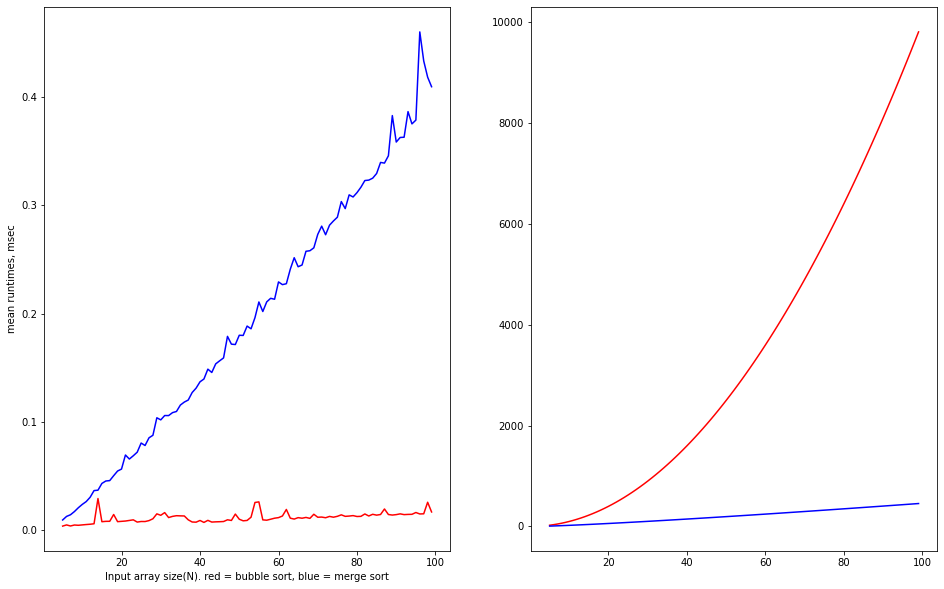

In [37]:
plt.figure(figsize = (16,10))
plt.subplot(1,2,1)
plt.plot([N1 + i for i in range(N2-N1)], rt_bsort_m, 'r-')
plt.plot([N1 + i for i in range(N2-N1)], rt_msort_m, 'b-')
plt.gca().set(xlabel='Input array size(N). red = bubble sort, blue = merge sort', ylabel='mean runtimes, msec')
plt.subplot(1,2,2)
plt.plot([N1 + i for i in range(N2-N1)], [x*x for x in range(N1, N2)], 'r-')
plt.plot([N1 + i for i in range(N2-N1)], [x*log(x) for x in range(N1,N2)], 'b-')

so the question is...

... WHAT. IS. **THIS** ?!

And the answer is: well, it depends on input! (surprise!). So, intuitively, we'd want to differentiate between the *worst-case*, *best-case*, and *average* performance (whatever it all would mean, precisely).

Actually, what we see, say, on Wiki [page](https://en.wikipedia.org/wiki/Merge_sort) describing an alorithm, is exactly this.

Therefore, people quite often talk about the *asymptotic worst-case runtime*. Now you have seen what each word means :)


### So, what to do?
Quite often you can see this $O(\cdot)$ notation. This is an *upper bound* on the respective runtime (say, on the *worst-case* performance. What is meant, usually, is this is how the runtime behaves as the *size* of the problem increases infinitely. For our case, the problem size is, naturally, $N$ -- how many numbers are there in the array.

People usually do not care about multiplicative constants (since $Ax^3$ will grow more than $Bx^2$, eventually, for any $A,B>0$ and $x>0$). This allows to disregard details and just count operations that do not depend on the input size. Let's consider an example.

- **For the bubble sort:** 
    + In the worst case, we will have to flip every one of the $N$ numbers with every other (if the input array is sorted, but in the wrong way -- e.g., in descending instead of ascending order). 
    + Then, we will have to perform $N(N-1)$ swap operations -- at most, regardless of anything. 
    + This is $N^2-N$, which still grows as fast as $N^2$, as $N$ increases infinitely. 
    
So, we'd write it as "bubble sort worst-case runtime is in $O(N^2)$". (There is no way it could run slower, right?)


- **For the merge sort:** let's consider what it does. 
    + Every `merge` operation takes $O(N)$ time, since it performs at most $N$ "ticks" while merging. We'd just need to count how many times this function could be invoked. 
    + Well, this is easy: this is the number of times we can divide $N$ into two, since each time we split it in two halves. 
    + If you think about it, this is the largest number $k$ such that $2^k \leq N$. We can use a slight overestimate, a number $k$ such that $2^k=N$, which mathematicians call $\log_2 N$. 
    + Therefore, we can say that we invoke the `merge` function (which takes $O(N)$ time), $\log_2 N$ times.
    
So, the worst-case runtime of the merge sort is $O(N \log N)$ (computer science people sometimes omit this subscript of $2$, if most of the logarithms are base-two).

So, let's recap. What is the worst-case runtime for merge sort?

- $O(N\log N)$
- $O(N^2)$
- $O(N^3)$
- $O(2^{2^N})$

Well, technically, **all** are correct :). It is just an upper bound. But it is usually the tight one we care about.

Sometimes we want to know what is the least possible asymptotic runtime -- there is a special notation for that. For example, the bubble sort cannot make fewer than $O(N)$ elementary operations (it needs to scan the array, at the very least). Although, our magic in `merge_sort` procedure implies that we are always making $O(N\log N)$ steps, no matter the initial data! (hence the last "strange" figure of runtimes)

If interested, google Omega and Theta notations (e.g., see the [Wiki](https://en.wikipedia.org/wiki/Big_O_notation)).

### The final remark on this
In practice, please do sorting like this, unless it is necessary to do otherwise:

In [24]:
import numpy as np

np.sort([1,5,2,7,3,4,1])

array([1, 1, 2, 3, 4, 5, 7])

In [25]:
# or, if you want to look fancy:
np.sort([1,5,2,7,3,4,1], kind='mergesort')

array([1, 1, 2, 3, 4, 5, 7])

No need to reinvent the bicycle. There are many algorithms already implemented for you in several great libraries. For example, lots of useful things are in [scikit-learn](https://scikit-learn.org/stable/) and (as you can tell even from this notebook) [numpy](https://numpy.org/), and so on. So if you are thinking to implement something -- a good first step is to look around, maybe something is already implemented (and chances are, with high-quality code, with support for special hardware, if needed, etc.).

## NP-hard problems

It seems that not all problems are solvable in polynomial time (in general case). There is a class of problems such that:
- a (given) solution can be *verified* in polynomial time,
- but no known algorithm exists to solve it (i.e., find a solution in first place) in polynomial time.

Is is a little more complicated than that, actually -- you can check out the concepts of [NP-hardness](https://en.wikipedia.org/wiki/NP-hardness), and [P vs NP](https://en.wikipedia.org/wiki/P_versus_NP_problem) problem, if you are interested. But if so, picking up a Computer Science textbook (or a course) might be a good idea...

In practice, it means that there is a big class of (relevant) problems, that do not allow for efficient exact solution. In this case people sometimes try to devise *approximate* algorithms (and sometimes, pretty successfully).

Selecting optimal phylogenetic trees / multiple sequence alignment (see, e.g., [wiki](https://en.wikipedia.org/wiki/Sequence_alignment)), [k-means](https://en.wikipedia.org/wiki/K-means_clustering) clustering, and many others are "computationally difficult". Also, see [List](https://en.wikipedia.org/wiki/List_of_NP-complete_problems) of NP-complete problems for some more examples.

### Examples of cool algorithms


### A note: space requirements
You can use this $O(\cdot)$ notation to analyze other requirements as well: for example, how much space does your (or someone else's) algorithm requires. For example, note that bubble sort does not require additional space (it can run over the same input array, *in-place*), while our implementation of merge sort required $O(N)$ units of additional memory.

# Take-aways
- (some) algorithms are cool
- they can (and should) be analyzed in a systematic, scientific way
- they are quite often characterized by runtime, space requirements, ability to parallelize, and correctness (obviously).
- asymptotic runtime: $O(\cdot)$, $\Omega(\cdot)$, $\Theta(\cdot)$ notations describe how does the runtime grow as the problem size increases). 
- Sometimes we discuss best-case, worst-case, and average performance.
- Cool algorithms are numerous, and it is quite possible that there is one for your (arbitrary) problem at hand.
- standard libraries are your friends (`numpy`, `sklearn`, etc. -- if we talk Python)
- if you are into *designing* (or understanding) algorithms, you'll need to get familiar with basic data structures. A good data structure is a game-changer, quite often. But this is a whole separate topic...

## The main part of the session: further reading
- GeeksForGeeks and Wikipedia are quite good, sometimes.
- docs for specific libraries (e.g., see sorting in [numpy docs](https://numpy.org/doc/stable/reference/generated/numpy.sort.html))
- there are some good online courses out there, if you'd like to have some more practice and dive deeper. I noticed the ones from Princeton and Stanford. But there are also some here on Stepik, etc. Check the reviews.
- CS textbooks
    - CSLR
    - Skiena
    - TAOCP, if you are hardcore